## Background

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import sklearn.mixture as mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import sys
sys.path.append('../resources')
import w8support as w8s

# Make sure the pic subdirectory exists
import os, errno
try:
    os.makedirs('pic')
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

%matplotlib inline

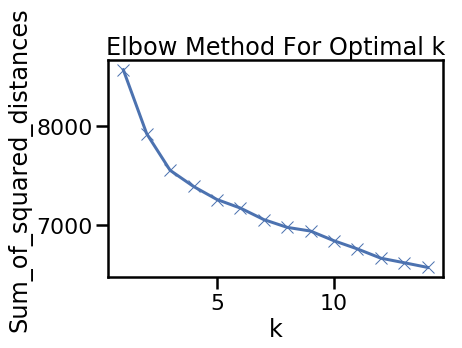

In [14]:
featureSub = pd.read_csv("oheTransformedData.csv")

from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(featureSub)
data.shape

mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Clustering Task 2 - K-means

0.3146219253540039


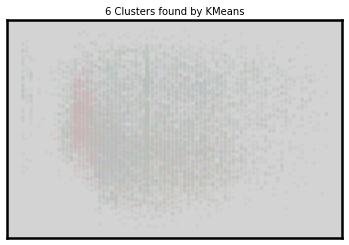

In [15]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 15, 'linewidths':0}
paletteName = 'deep'
fontSize = 10
fc = '#cccccc'

from scipy.spatial.distance import cdist
outFile = 'pic/kmeans6_generated.pdf'
nClusters = 5
clusterParams = {'n_clusters':nClusters, 'random_state':0}
algName = "KMeans"

start_time = time.time()
kmeans = cluster.KMeans(**clusterParams)
labels = kmeans.fit_predict(data)
# Subsequently, this will be invoked using a function call of the form
# kmeans, labels = w8s.fitClusterLabels(data, cluster.KMeans, (), clusterParams)
end_time = time.time()
elapsed_time = end_time-start_time
print(elapsed_time)

title = '{} Clusters found by {}'.format(str(nClusters),algName)
plt = w8s.plot_2dClusters(data, labels, title, paletteName, fontSize, plot_kwds)
outFile = 'pic/{}{}_generated.pdf'.format(algName,str(nClusters))
plt.savefig(outFile)

title = '{} Clusters (with regions) found by {}'.format(str(nClusters),algName)
centres = kmeans.cluster_centers_
radii = [cdist(data[labels == i], [center]).max()
         for i, center in enumerate(centres)]
plt = w8s.overlayDisks(plt, centres, radii, fc, plot_kwds)
outFile = 'pic/{}{}withCentres_generated.pdf'.format(algName,str(nClusters))
plt.savefig(outFile)